# Pythonを使って、COVID-19のデータを可視化してみよう

## コンテンツ
- 使用するデータの確認
- データを使いやすくする
- いろんな図を作ってみる
- インタラクティブな図を作ってみる

## 使用するライブラリ

主なもの

- pandas
- matplotlib
- pycountry
- pandas_bokeh
- lightning-python
- folium

お手持ちのPCで動かす際は、別途installが必要なものがあると思います。  
condaやpip等でinstallしてください。

## 使用するデータ

- [CSSEGISandData/COVID-19: Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)  
- 論文：[An interactive web-based dashboard to track COVID-19 in real time - The Lancet Infectious Diseases](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30120-1/fulltext)  
- view site：[Coronavirus COVID-19 (2019-nCoV)](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

[![Image from Gyazo](https://i.gyazo.com/d466d9b8474bb1c6722d79fa62cf23e9.png)](https://gyazo.com/d466d9b8474bb1c6722d79fa62cf23e9)

githubのレポジトリをclone

In [1]:
!git clone https://github.com/CSSEGISandData/COVID-19.git
!git clone https://github.com/ykohki/COVID-19_plot_training

Cloning into 'COVID-19'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 22343 (delta 10), reused 16 (delta 9), pack-reused 22322
Receiving objects: 100% (22343/22343), 96.97 MiB | 31.03 MiB/s, done.
Resolving deltas: 100% (12058/12058), done.
Cloning into 'COVID-19_plot_training'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 108 (delta 57), reused 66 (delta 28), pack-reused 0
Receiving objects: 100% (108/108), 25.44 MiB | 32.97 MiB/s, done.
Resolving deltas: 100% (57/57), done.


ダウンロードできているか確認

In [2]:
!ls

COVID-19  COVID-19_plot_training  sample_data


## データを見てみる

COVID-19/csse_covid_19_data/  
以下にあるデータを使用

- csse_covid_19_daily_reports
- csse_covid_19_time_series  

の2種類

### csse_covid_19_daily_reports

01-22-2020.csv~現在まで

[COVID-19/csse_covid_19_data/csse_covid_19_daily_reports at master · CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)

<img src="https://i.gyazo.com/04c09c97c93dc1b99cfc5541fb9b22b7.png" width="60%">

### csse_covid_19_time_series

[COVID-19/csse_covid_19_data/csse_covid_19_time_series at master · CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

使うデータは、  
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

### pandasを使って、csvファイルを見てみる

In [0]:
import pandas as pd

データの読み込み

変数の名前 = pd.read_csv(読み込むファイルの居場所（パス）)

In [0]:
df_time_confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

ファイルの先頭5行を見てみる

In [5]:
df_time_confirmed.head()

Province/State Country/Region      Lat  ...  4/22/20  4/23/20  4/24/20
0            NaN    Afghanistan  33.0000  ...     1176     1279     1351
1            NaN        Albania  41.1533  ...      634      663      678
2            NaN        Algeria  28.0339  ...     2910     3007     3127
3            NaN        Andorra  42.5063  ...      723      723      731
4            NaN         Angola -11.2027  ...       25       25       25

[5 rows x 98 columns]

例えば、4/1/20のデータを見たいときは...

In [6]:
df_time_confirmed["4/1/20"].head()

0    237
1    259
2    847
3    390
4      8
Name: 4/1/20, dtype: int64

国名を見たいときは

In [7]:
df_time_confirmed["Country/Region"].head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

### 課題1

4/8/20のデータを表示させてみて下さい

In [8]:
df_time_confirmed["4/8/20"].head()

0     444
1     400
2    1572
3     564
4      19
Name: 4/8/20, dtype: int64

confirmed, deaths, recoveredのファイルをそれぞれ読み込んでおく

In [0]:
df_time_confirmed = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_time_deaths = \
pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_time_recovered = \
pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

## データを使いやすくする

In [10]:
df_time_confirmed.head()

Province/State Country/Region      Lat  ...  4/22/20  4/23/20  4/24/20
0            NaN    Afghanistan  33.0000  ...     1176     1279     1351
1            NaN        Albania  41.1533  ...      634      663      678
2            NaN        Algeria  28.0339  ...     2910     3007     3127
3            NaN        Andorra  42.5063  ...      723      723      731
4            NaN         Angola -11.2027  ...       25       25       25

[5 rows x 98 columns]

カラム名を表示させる

In [0]:
df_time_confirmed.columns

### いらないカラム（列）の削除

'Province/State', 'Lat', 'Long'を削除

In [11]:
df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long'])

Country/Region  1/22/20  1/23/20  ...  4/22/20  4/23/20  4/24/20
0              Afghanistan        0        0  ...     1176     1279     1351
1                  Albania        0        0  ...      634      663      678
2                  Algeria        0        0  ...     2910     3007     3127
3                  Andorra        0        0  ...      723      723      731
4                   Angola        0        0  ...       25       25       25
..                     ...      ...      ...  ...      ...      ...      ...
259                 France        0        0  ...        1        1        1
260            South Sudan        0        0  ...        4        5        5
261         Western Sahara        0        0  ...        6        6        6
262  Sao Tome and Principe        0        0  ...        4        4        4
263                  Yemen        0        0  ...        1        1        1

[264 rows x 95 columns]

In [0]:
df_test = df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long'])

行の長さを数えてみる

In [16]:
len(df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long']))

264

Country/Regionごとにまとめる

[![Image from Gyazo](https://i.gyazo.com/3d3cc6ed1ef6ca9d326e386fa2d5f1e2.png)](https://gyazo.com/3d3cc6ed1ef6ca9d326e386fa2d5f1e2)

In [13]:
df_test.groupby('Country/Region').sum()

1/22/20  1/23/20  1/24/20  ...  4/22/20  4/23/20  4/24/20
Country/Region                                 ...                           
Afghanistan               0        0        0  ...     1176     1279     1351
Albania                   0        0        0  ...      634      663      678
Algeria                   0        0        0  ...     2910     3007     3127
Andorra                   0        0        0  ...      723      723      731
Angola                    0        0        0  ...       25       25       25
...                     ...      ...      ...  ...      ...      ...      ...
West Bank and Gaza        0        0        0  ...      474      480      484
Western Sahara            0        0        0  ...        6        6        6
Yemen                     0        0        0  ...        1        1        1
Zambia                    0        0        0  ...       74       76       84
Zimbabwe                  0        0        0  ...       28       28       29

[185 rows x 94 columns]

In [0]:
df_test_2 = df_test.groupby('Country/Region').sum()

In [15]:
# 行数
len(df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum())

185

### カラムとインデックスの反転

transpose()メソッド または T属性

In [17]:
df_test_2.T

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
1/22/20                   0        0        0  ...      0       0         0
1/23/20                   0        0        0  ...      0       0         0
1/24/20                   0        0        0  ...      0       0         0
1/25/20                   0        0        0  ...      0       0         0
1/26/20                   0        0        0  ...      0       0         0
...                     ...      ...      ...  ...    ...     ...       ...
4/20/20                1026      584     2718  ...      1      65        25
4/21/20                1092      609     2811  ...      1      70        28
4/22/20                1176      634     2910  ...      1      74        28
4/23/20                1279      663     3007  ...      1      76        28
4/24/20                1351      678     3127  ...      1      84        29

[94 rows x 185 columns]

まとめる

In [0]:
df_time_confirmed_sum = \
df_time_confirmed.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum().T

In [0]:
# 他の2つのdataframeも同じく
df_time_deaths_sum = \
df_time_deaths.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum().T
df_time_recovered_sum = \
df_time_recovered.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum().T

### 国名→国名コードに変換する

In [0]:
df_time_confirmed_sum.columns

[国名コード](http://www.kc.tsukuba.ac.jp/ulismeta/metadata/standard/cntry_code.html)

#### pycountryで変換

[flyingcircusio/pycountry: A Python library to access ISO country, subdivision, language, currency and script definitions and their translations.](https://github.com/flyingcircusio/pycountry)

In [20]:
#install
!pip install pycountry

     |████████████████████████████████| 10.0MB 2.8MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=02ac3a3fd0ac936d1c12e757356fd8e043ee58ac3216443f8f00248b581e0f9a
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [0]:
import pycountry

In [22]:
pycountry.countries.get(name='Japan').alpha_3

'JPN'

In [23]:
pycountry.countries.get(name='Japan').alpha_2

'JP'

dataframeのカラム名ごとに、国コードに変換していく

In [24]:
df_time_confirmed_sum.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=185)

In [25]:
# 空のリスト作成
list_country_code = []
list_country_ = []

# 国名を3文字コードに変換していく
for i in list(df_time_confirmed_sum.columns):
    try:
        list_country_code.append(pycountry.countries.get(name=i).alpha_3)
        list_country_.append(i)
    except:
        print(i)

Bolivia
Brunei
Burma
Congo (Brazzaville)
Congo (Kinshasa)
Cote d'Ivoire
Diamond Princess
Holy See
Iran
Korea, South
Kosovo
Laos
MS Zaandam
Moldova
Russia
Syria
Taiwan*
Tanzania
US
Venezuela
Vietnam
West Bank and Gaza


In [0]:
list_country_code

↑ printされたものが、自動では変換されなかったもの

リストに入っている国名だけで辞書を作成

In [27]:
dict(zip(list_country_, list_country_code))

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Costa Rica': 'CRI',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Cyprus': 'CYP',
 'Czechia': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominica': 'DMA',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Erit

In [0]:
dict_country_code = dict(zip(list_country_, list_country_code))

In [29]:
len(dict_country_code)

163

手動で変換

参考：[国名コード](http://www.kc.tsukuba.ac.jp/ulismeta/metadata/standard/cntry_code.html)

```
"Bolivia": "BOL",
"Brunei": "BRN",
"Burma": "MMR",
"Congo (Brazzaville)": "COG",
"Congo (Kinshasa)": "COG",
"Cote d'Ivoire": "CIV",
"Holy See": "VAT",
"Iran": "IRN",
# "Korea, South": "PRK", (間違い)
"Korea, South": "KOR", 
"Laos": "LAO",
"Moldova": "MDA",
"Russia": "RUS",
"Syria": "SYR",
"Taiwan*": "TWN",
"Tanzania": "TZA",
"US": "USA",
"Venezuela": "VEN",
"Vietnam": "VNM",
```

(修正) Korea, SouthをPRKとしてしまいました。  訂正致しました。

除外するカラム

```
"Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"
```

In [0]:
df_time_confirmed_sum = df_time_confirmed_sum.drop(columns=["Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"])
df_time_deaths_sum = df_time_deaths_sum.drop(columns=["Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"])
df_time_recovered_sum = df_time_recovered_sum.drop(columns=["Diamond Princess", "Kosovo", "MS Zaandam", "West Bank and Gaza"])

手動で変換した分を辞書に追加

In [0]:
dict_country_code.update(
{"Bolivia": "BOL",
"Brunei": "BRN",
"Burma": "MMR",
"Congo (Brazzaville)": "COG",
"Congo (Kinshasa)": "COG",
"Cote d'Ivoire": "CIV",
"Holy See": "VAT",
"Iran": "IRN",
"Korea, South": "KOR",
"Laos": "LAO",
"Moldova": "MDA",
"Russia": "RUS",
"Syria": "SYR",
"Taiwan*": "TWN",
"Tanzania": "TZA",
"US": "USA",
"Venezuela": "VEN",
"Vietnam": "VNM"}
)

In [32]:
len(dict_country_code)

181

In [33]:
dict_country_code

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burma': 'MMR',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Congo (Brazzaville)': 'COG',
 'Congo (Kinshasa)': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Cyprus': 'CYP',
 'Czechia': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Domi

#### dataframeのカラム名をコードに変換する

In [0]:
# 辞書を元に、カラム名の国名を変換
list_country_code_columns = []
for i in list(df_time_confirmed_sum.columns):
    list_country_code_columns.append(dict_country_code[i])
df_time_confirmed_sum.columns = list_country_code_columns

In [0]:
df_time_deaths_sum.columns = list_country_code_columns
df_time_recovered_sum.columns = list_country_code_columns

In [36]:
df_time_confirmed_sum.head()

AFG  ALB  DZA  AND  AGO  ATG  ARG  ...  UZB  VEN  VNM  ESH  YEM  ZMB  ZWE
1/22/20    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1/23/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0
1/24/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0
1/25/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0
1/26/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0

[5 rows x 181 columns]

dataframe全体を整数に

In [0]:
df_time_confirmed_sum = df_time_confirmed_sum.round()
df_time_deaths_sum = df_time_deaths_sum.round()
df_time_recovered_sum = df_time_recovered_sum.round()

## いろんなplotを作ってみる

### 国ごとの、時間に沿った確認患者数の折れ線グラフ

In [0]:
import matplotlib.pyplot as plt

In [38]:
df_time_confirmed_sum.head()

AFG  ALB  DZA  AND  AGO  ATG  ARG  ...  UZB  VEN  VNM  ESH  YEM  ZMB  ZWE
1/22/20    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1/23/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0
1/24/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0
1/25/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0
1/26/20    0    0    0    0    0    0    0  ...    0    0    2    0    0    0    0

[5 rows x 181 columns]

country以下を好きな国に変更

In [39]:
country = "JPN"
df_time_confirmed_sum[country]

1/22/20        2
1/23/20        2
1/24/20        2
1/25/20        2
1/26/20        4
           ...  
4/20/20    10797
4/21/20    11135
4/22/20    11512
4/23/20    12368
4/24/20    12829
Name: JPN, Length: 94, dtype: int64

Text(0.5, 1.0, 'JPN')

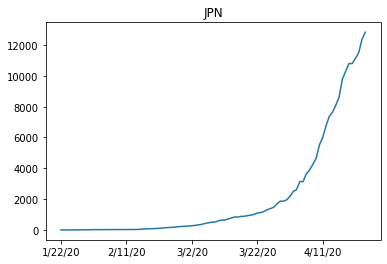

In [40]:
country = "JPN"
df_time_confirmed_sum[country].plot()
plt.title(country)
#plt.savefig('fig/plot_japan_no_yaxis.pdf')

In [0]:
df_time_confirmed_sum[country]

Text(0.5, 1.0, 'USA')

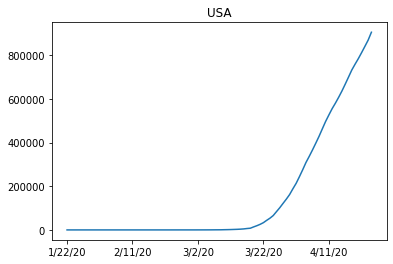

In [41]:
country = "USA"
df_time_confirmed_sum[country].plot()
plt.title(country)
#plt.savefig('fig/plot_usa_no_yaxis.pdf')

Text(0.5, 1.0, 'ESP')

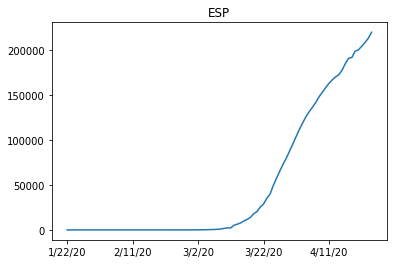

In [42]:
country = "ESP"
df_time_confirmed_sum[country].plot()
plt.title(country)
#plt.savefig('fig/plot_spain_no_yaxis.pdf')

dataframeから最大値を見つける

In [43]:
df_time_confirmed_sum.max()

AFG    1351
ALB     678
DZA    3127
AND     731
AGO      25
       ... 
VNM     270
ESH       6
YEM       1
ZMB      84
ZWE      29
Length: 181, dtype: int64

In [44]:
df_time_confirmed_sum.max().sort_values(ascending=False)

USA    905358
ESP    219764
ITA    192994
FRA    159952
DEU    154999
        ...  
MRT         7
ESH         6
SSD         5
STP         4
YEM         1
Length: 181, dtype: int64

In [45]:
# 全体の最大値を取得
df_time_confirmed_sum[-1:].max(axis=1)

4/24/20    905358
dtype: int64

In [46]:
today_max = df_time_confirmed_sum[-1:].max(axis=1).values[0]
today_max

905358

最大値を丸め込んでおく

In [47]:
round(today_max, -4)

910000

In [0]:
today_max_round = round(today_max, -4)

y軸の範囲をそろえる

(0.0, 910000.0)

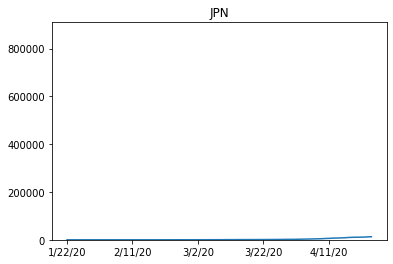

In [49]:
country = "JPN"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, today_max_round])
#plt.savefig('fig/plot_japan.pdf')

(0.0, 910000.0)

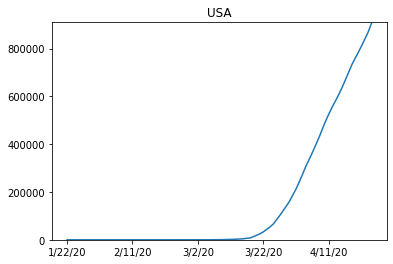

In [50]:
country = "USA"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, today_max_round])
#plt.savefig('fig/plot_usa.pdf')

(0.0, 910000.0)

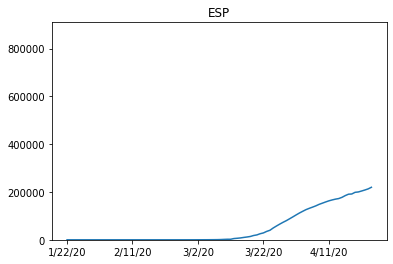

In [51]:
country = "ESP"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, today_max_round])
#plt.savefig('fig/plot_spain.pdf')

### 課題2

1. 好きな国を選んで、折れ線図を表示させてみてください

(0.0, 910000.0)

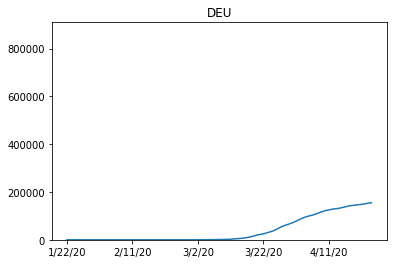

In [52]:
# ドイツ
country = "DEU"
df_time_confirmed_sum[country].plot()
plt.title(country)
plt.ylim([0, today_max_round])

参考：[国名コード](http://www.kc.tsukuba.ac.jp/ulismeta/metadata/standard/cntry_code.html)  
国名コードはこちらで調べられます

2. 死者数、回復した患者数でも同様の図を作ってみてください

### 感染者数を多い順に並べる

10ヶ国だけ見てみる

In [53]:
df_time_confirmed_sum.max().sort_values(ascending=False)[0:10]

USA    905358
ESP    219764
ITA    192994
FRA    159952
DEU    154999
GBR    144640
TUR    104912
IRN     88194
CHN     83899
RUS     68622
dtype: int64

top10ヶ国だけのdataframeを抜き出す

In [54]:
list_top10_country = list(df_time_confirmed_sum.max().sort_values(ascending=False)[0:10].index)
df_time_confirmed_sum[list_top10_country]

USA     ESP     ITA     FRA  ...     TUR    IRN    CHN    RUS
1/22/20       1       0       0       0  ...       0      0    548      0
1/23/20       1       0       0       0  ...       0      0    643      0
1/24/20       2       0       0       2  ...       0      0    920      0
1/25/20       2       0       0       3  ...       0      0   1406      0
1/26/20       5       0       0       3  ...       0      0   2075      0
...         ...     ...     ...     ...  ...     ...    ...    ...    ...
4/20/20  784326  200210  181228  155393  ...   90980  83505  83817  47121
4/21/20  811865  204178  183957  158168  ...   95591  84802  83853  52763
4/22/20  840351  208389  187327  155980  ...   98674  85996  83868  57999
4/23/20  869170  213024  189973  158303  ...  101790  87026  83884  62773
4/24/20  905358  219764  192994  159952  ...  104912  88194  83899  68622

[94 rows x 10 columns]

折れ線図

Text(0.5, 1.0, 'confirmed top10')

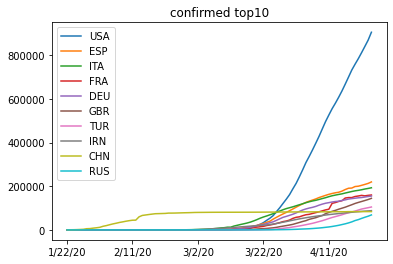

In [55]:
df_time_confirmed_sum[list_top10_country].plot()
plt.title("confirmed top10")
#plt.savefig('fig/plot_top10_confirmed.pdf')

### 現在の感染者確認数のtop10を棒グラフで見てみる

dataframeの最終行を表示

In [56]:
df_time_confirmed_sum[list_top10_country][-1:]

USA     ESP     ITA     FRA  ...     TUR    IRN    CHN    RUS
4/24/20  905358  219764  192994  159952  ...  104912  88194  83899  68622

[1 rows x 10 columns]

Text(0.5, 1.0, 'confirmed top10')

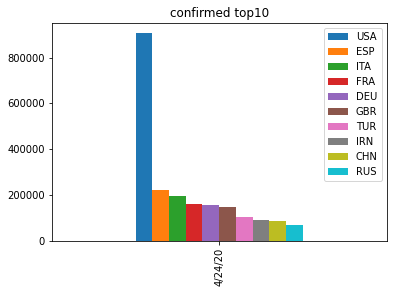

In [57]:
df_time_confirmed_sum[list_top10_country][-1:].plot.bar()
plt.title("confirmed top10")
#plt.savefig('fig/bar_top10_confirmed.pdf')

## インタラクティブな図を作成

### pandas-bokeh

[PatrikHlobil/Pandas-Bokeh: Bokeh Plotting Backend for Pandas and GeoPandas](https://github.com/PatrikHlobil/Pandas-Bokeh)

In [58]:
!pip install pandas_bokeh

In [0]:
import pandas_bokeh
pandas_bokeh.output_notebook()

In [60]:
df_time_confirmed_sum[list_top10_country]

USA     ESP     ITA     FRA  ...     TUR    IRN    CHN    RUS
1/22/20       1       0       0       0  ...       0      0    548      0
1/23/20       1       0       0       0  ...       0      0    643      0
1/24/20       2       0       0       2  ...       0      0    920      0
1/25/20       2       0       0       3  ...       0      0   1406      0
1/26/20       5       0       0       3  ...       0      0   2075      0
...         ...     ...     ...     ...  ...     ...    ...    ...    ...
4/20/20  784326  200210  181228  155393  ...   90980  83505  83817  47121
4/21/20  811865  204178  183957  158168  ...   95591  84802  83853  52763
4/22/20  840351  208389  187327  155980  ...   98674  85996  83868  57999
4/23/20  869170  213024  189973  158303  ...  101790  87026  83884  62773
4/24/20  905358  219764  192994  159952  ...  104912  88194  83899  68622

[94 rows x 10 columns]

#### 折れ線図をplot

JPNとUSAを比較

In [61]:
df_time_confirmed_sum[["JPN", "USA"]]

JPN     USA
1/22/20      2       1
1/23/20      2       1
1/24/20      2       2
1/25/20      2       2
1/26/20      4       5
...        ...     ...
4/20/20  10797  784326
4/21/20  11135  811865
4/22/20  11512  840351
4/23/20  12368  869170
4/24/20  12829  905358

[94 rows x 2 columns]

In [62]:
df_time_confirmed_sum[["JPN", "USA"]].plot_bokeh.line()

Figure(id='1001', ...)

In [0]:
#保存する場合
import pandas_bokeh
df_time_confirmed_sum[["JPN", "USA"]].plot_bokeh.line()
pandas_bokeh.output_file("fig/interactive/bokeh_line_jpn_usa.html")

In [63]:
import pandas_bokeh
pandas_bokeh.output_notebook()
df_time_confirmed_sum[["USA", "ESP"]].plot_bokeh.line()

Figure(id='1129', ...)

top10ヶ国で

In [64]:
df_time_confirmed_sum[list_top10_country].plot_bokeh.line()

Figure(id='1257', ...)

棒グラフ

In [65]:
df_time_confirmed_sum[list_top10_country][-1:].plot_bokeh.bar()

Figure(id='1742', ...)

### 課題3

2ヶ国を選んで、Bokehでインタラクティブな折れ線図を描いてみよう

In [66]:
# 中国と日本
import pandas_bokeh
pandas_bokeh.output_notebook()
df_time_confirmed_sum[["CHN", "JPN"]].plot_bokeh.line()

Figure(id='2016', ...)

### コロプレス図を作成

### Lightning

※google colabの環境では、上手く表示できません。  
ご自身のPCで動かせる方は試してみて下さい。

[lightning-viz/lightning: Data Visualization Server](https://github.com/lightning-viz/lightning)

参考：  
いろいろな作例がのっているnotebook→[Jupyter Notebook Viewer](https://nbviewer.jupyter.org/github/lightning-viz/lightning-example-notebooks/blob/master/index.ipynb)

In [0]:
!pip install lightning-python

In [0]:
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)
# lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

[lightning.Lightning.map — Lightning 1.1.1 documentation](http://lightning-viz.org/lightning-python/generated/lightning.Lightning.map.html)

例

In [0]:
import numpy as np

countries = ['USA', 'CHN', 'JPN', 'DEU', 'GBR',
             'FRA', 'IND', 'ITA', 'BRA', 'CAN']

values = (np.random.rand(len(countries)) * 5).astype('int')
lgn.map(countries, values)

df_time_confirmed_sumのデータで

In [0]:
df_time_confirmed_sum[-1:]

値だけを取り出す

In [0]:
df_time_confirmed_sum[-1:].values[0]

In [0]:
# lgn.map(countries, values)
lgn.map(list(df_time_confirmed_sum.columns), df_time_confirmed_sum[-1:].values[0])

カラーを変更する

In [0]:
# lgn.map(countries, values)
lgn.map(
    list(df_time_confirmed_sum.columns), 
    df_time_confirmed_sum[-1:].values[0].astype('int'), 
    colormap="Spectral")

In [0]:
# lgn.map(countries, values)
lgn.map(
    list(df_time_confirmed_sum.columns), 
    df_time_confirmed_sum[-1:].values[0].astype('int'), 
    colormap="Lightning")

### Folium

In [67]:
!pip install folium==0.10.1

     |████████████████████████████████| 92kB 2.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.10.1 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [0]:
import folium

versionの確認

In [69]:
print(folium.__version__)

0.10.1


Jupyter内部で描画

In [0]:
from IPython.display import HTML

def inline_map(m):
    # 中間生成される json が必要なプロットがあるため、一度 html として書き出し
    m.create_map(path='tmp.html')
    iframe = '<iframe srcdoc=\"{srcdoc}\" style=\"width: 100%; height: 400px; border: none\"></iframe>'
    return HTML(iframe.format(srcdoc=m.HTML.replace('\"', '&quot;')))

必要なデータ
- GeoJSON もしくは TopoJSON 形式のファイル
- コロプレス図を色分けするための値を含む pandas の DataFrame

geojsonデータ→[johan/world.geo.json: Annotated geo-json geometry files for the world](https://github.com/johan/world.geo.json)

In [71]:
!git clone https://github.com/johan/world.geo.json

Cloning into 'world.geo.json'...
remote: Enumerating objects: 3954, done.
remote: Total 3954 (delta 0), reused 0 (delta 0), pack-reused 3954
Receiving objects: 100% (3954/3954), 1.21 MiB | 12.63 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [72]:
!ls

COVID-19  COVID-19_plot_training  sample_data  world.geo.json


./world.geo.json-master/countries.geo.json

まずは地図をplotしてみる

In [73]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)

m

foliumでplotできるように、dataframeを調整する

現在のデータ

In [74]:
df_time_confirmed_sum[-1:]

AFG  ALB   DZA  AND  AGO  ATG  ...  VEN  VNM  ESH  YEM  ZMB  ZWE
4/24/20  1351  678  3127  731   25   24  ...  318  270    6    1   84   29

[1 rows x 181 columns]

In [75]:
df_time_confirmed_sum[-1:].T

4/24/20
AFG     1351
ALB      678
DZA     3127
AND      731
AGO       25
..       ...
VNM      270
ESH        6
YEM        1
ZMB       84
ZWE       29

[181 rows x 1 columns]

In [76]:
df_latest = df_time_confirmed_sum[-1:].T.reset_index()
df_latest.columns = ["country", "number"]
df_latest.head()

country  number
0     AFG    1351
1     ALB     678
2     DZA    3127
3     AND     731
4     AGO      25

In [0]:
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlGnBu', reset=True)

In [77]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlGnBu', reset=True)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [0]:
# htmlに保存する場合はこちら

m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlGnBu', reset=True)

m.save(outfile="fig/folium/latest_YlGnBu.html")

カラーの変更

[python foliumのコロプレス図で選択可能なfill_color について | Monotalk](https://www.monotalk.xyz/blog/python-folium%E3%81%AE%E3%82%B3%E3%83%AD%E3%83%97%E3%83%AC%E3%82%B9%E5%9B%B3%E3%81%A7%E9%81%B8%E6%8A%9E%E5%8F%AF%E8%83%BD%E3%81%AAfill_color-%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6/)

In [78]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='PRGn', reset=True)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [79]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### マーカーを追加してみる

In [80]:
list_top10_country

['USA', 'ESP', 'ITA', 'FRA', 'DEU', 'GBR', 'TUR', 'IRN', 'CHN', 'RUS']

#### 各国の首都の緯度経度をdataframeで扱う

In [81]:
df_capital = pd.read_csv("COVID-19_plot_training/files/capital_geo_list.csv")
df_capital.head()

Country Name Capital Name  ...  Country Code  Continent Name
0     Afghanistan        Kabul  ...            AF            Asia
1   Aland Islands    Mariehamn  ...            AX          Europe
2         Albania       Tirana  ...            AL          Europe
3         Algeria      Algiers  ...            DZ          Africa
4  American Samoa    Pago Pago  ...            AS       Australia

[5 rows x 6 columns]

Country Codeの2文字コードをpycountryで3文字コードに変換する

In [82]:
list_country_code_capital = []
for i in list(df_capital["Country Code"]):
    try:
        list_country_code_capital.append(pycountry.countries.get(alpha_2=i).alpha_3)
        # print(pycountry.countries.get(alpha_2=i).alpha_3)
    except:
        print(i)
        list_country_code_capital.append(i)

KO
nan
nan
nan


df_capitalにカラムを追加

In [83]:
df_capital["code3"] = list_country_code_capital
df_capital.head()

Country Name Capital Name  ...  Continent Name  code3
0     Afghanistan        Kabul  ...            Asia    AFG
1   Aland Islands    Mariehamn  ...          Europe    ALA
2         Albania       Tirana  ...          Europe    ALB
3         Algeria      Algiers  ...          Africa    DZA
4  American Samoa    Pago Pago  ...       Australia    ASM

[5 rows x 7 columns]

df_capitalから緯度経度を抽出

In [84]:
df_capital[df_capital["code3"] == "USA"]

Country Name      Capital Name  ...   Continent Name  code3
231  United States  Washington, D.C.  ...  Central America    USA

[1 rows x 7 columns]

df_time_confirmed_sum[-1:]から値を抽出

In [85]:
df_time_confirmed_sum[-1:]["USA"]

4/24/20    905358
Name: USA, dtype: int64

In [86]:
df_time_confirmed_sum[-1:]["USA"][0]

905358

In [0]:
df_time_confirmed_sum[-1:]["USA"][0].dtype

for文でマーカーを追加してplot

In [87]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_latest,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

# マーカーの追加
for i in list_top10_country:
    capital = df_capital[df_capital["code3"] == i]
    folium.Marker(
    [capital["Capital Latitude"], capital["Capital Longitude"]],
    popup=df_time_confirmed_sum[-1:][i][0]
    ).add_to(m)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### 2/1のデータでコロプレス図をplot

In [88]:
df_time_confirmed_sum

AFG  ALB   DZA  AND  AGO  ATG  ...  VEN  VNM  ESH  YEM  ZMB  ZWE
1/22/20     0    0     0    0    0    0  ...    0    0    0    0    0    0
1/23/20     0    0     0    0    0    0  ...    0    2    0    0    0    0
1/24/20     0    0     0    0    0    0  ...    0    2    0    0    0    0
1/25/20     0    0     0    0    0    0  ...    0    2    0    0    0    0
1/26/20     0    0     0    0    0    0  ...    0    2    0    0    0    0
...       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
4/20/20  1026  584  2718  717   24   23  ...  256  268    6    1   65   25
4/21/20  1092  609  2811  717   24   23  ...  285  268    6    1   70   28
4/22/20  1176  634  2910  723   25   24  ...  288  268    6    1   74   28
4/23/20  1279  663  3007  723   25   24  ...  311  268    6    1   76   28
4/24/20  1351  678  3127  731   25   24  ...  318  270    6    1   84   29

[94 rows x 181 columns]

In [89]:
df_time_confirmed_sum.loc["2/1/20"]

AFG    0
ALB    0
DZA    0
AND    0
AGO    0
      ..
VNM    6
ESH    0
YEM    0
ZMB    0
ZWE    0
Name: 2/1/20, Length: 181, dtype: int64

In [90]:
df_test = df_time_confirmed_sum.loc["2/1/20"].T.reset_index()
df_test.columns = ["country", "number"]
df_test.head()

country  number
0     AFG       0
1     ALB       0
2     DZA       0
3     AND       0
4     AGO       0

In [91]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_test,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### 3/1で見てみる

In [92]:
df_test = df_time_confirmed_sum.loc["3/1/20"].T.reset_index()
df_test.columns = ["country", "number"]
df_test.head()

country  number
0     AFG       1
1     ALB       0
2     DZA       1
3     AND       0
4     AGO       0

In [93]:
m = folium.Map(location=[10, 35], zoom_start=1.5)

geojson = "./world.geo.json/countries.geo.json"
folium.GeoJson(geojson).add_to(m)
m.choropleth(geo_data=geojson, data=df_test,
             columns=['country', 'number'],
             key_on='feature.id',
             fill_color='YlOrRd', reset=True)

m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
